<a href="https://colab.research.google.com/github/maneesh8123/Deep-kearning-with-tensorflow/blob/main/deep_learning_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf


# **Objective**
This is a cnn model for traing mnist dataset(which cotains hand written images of numbers between 0 to 9) with tensorflow 

In [2]:
tf.__version__

'2.8.0'

In [9]:
mnist=tf.keras.datasets.mnist

In [10]:
mnist #imges of handwritten digits between 0-9

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [11]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [20]:


print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

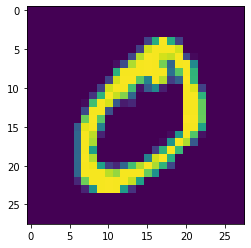

In [17]:
plt.imshow(x_train[1])

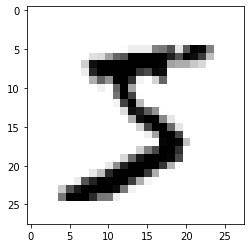

In [18]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [21]:
#scaling the image data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [22]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [23]:
#creating cnn model here i using relu and softmax(on output dense layer ,that is softmax performe well on multicategorical problems) activation function

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #Final layer

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2650 - accuracy: 0.9232
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1080 - accuracy: 0.9674
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0724 - accuracy: 0.9769


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (32, 784)                 0         
                                                                 
 dense (Dense)               (32, 128)                 100480    
                                                                 
 dense_1 (Dense)             (32, 128)                 16512     
                                                                 
 dense_2 (Dense)             (32, 10)                  1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [29]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.1016 - accuracy: 0.9672
0.10161314904689789
0.967199981212616


In [30]:
#saving the model
model.save('digit_recognizer.model')

INFO:tensorflow:Assets written to: digit_recognizer.model/assets


In [31]:
#Loading the saved model
new_model = tf.keras.models.load_model('digit_recognizer.model')

In [32]:
predictions = new_model.predict(x_test)

In [33]:
predictions

array([[2.5852431e-10, 1.0934058e-08, 2.9948624e-06, ..., 9.9998415e-01,
        1.5013877e-09, 3.3129953e-07],
       [1.1877876e-08, 1.7936464e-04, 9.9980193e-01, ..., 2.2814964e-07,
        4.1803232e-06, 8.2663182e-10],
       [5.9652956e-07, 9.9798125e-01, 6.6359011e-05, ..., 1.2782572e-03,
        5.1651581e-04, 1.8618648e-05],
       ...,
       [7.0769572e-09, 7.6174480e-08, 4.0399907e-08, ..., 1.6010407e-04,
        1.4396037e-04, 1.5692528e-03],
       [2.5472709e-06, 2.4077676e-07, 2.7767891e-07, ..., 4.7368276e-06,
        1.2875003e-03, 2.7994471e-08],
       [7.4028020e-07, 3.9510742e-10, 8.7027399e-09, ..., 1.1321430e-12,
        4.4294626e-07, 2.8132899e-08]], dtype=float32)

In [34]:
import numpy as np

print(np.argmax(predictions[0]))

7


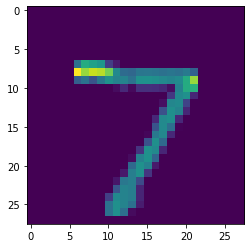

In [35]:
plt.imshow(x_test[0])
plt.show()

In [36]:
new_model.predict(x_train)

array([[1.8133642e-11, 1.7028988e-07, 1.0498481e-09, ..., 2.9872100e-09,
        6.7797901e-10, 8.0170548e-07],
       [9.9995279e-01, 1.2786465e-08, 1.7185368e-05, ..., 6.0213488e-08,
        1.0672627e-06, 1.6209369e-05],
       [1.2669478e-09, 3.5427405e-05, 4.1296784e-04, ..., 2.0433983e-03,
        7.5349499e-06, 8.3236511e-05],
       ...,
       [2.4947210e-13, 7.0608980e-10, 1.2155395e-14, ..., 8.1983953e-14,
        2.0167661e-07, 2.0133987e-06],
       [3.7311463e-06, 3.1576262e-06, 9.6499912e-07, ..., 1.3925655e-09,
        1.2391633e-05, 6.5356539e-07],
       [2.1717673e-07, 3.2424139e-09, 2.1759176e-07, ..., 3.5700853e-07,
        9.9996150e-01, 1.0297548e-05]], dtype=float32)

In [38]:
print(np.argmax(new_model.predict(x_train)[0]))

5


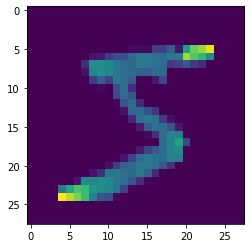

In [39]:
plt.imshow(x_train[0])
plt.show()